# Data Exploration - tthis updated 1:30PM

## 1. Importing data into DataFrames

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
df_mojo_gross = pd.read_csv('dsc-phase-1-project/zippedData/bom.movie_gross.csv.gz')
df_imdb_name_basics = pd.read_csv('dsc-phase-1-project/zippedData/imdb.name.basics.csv.gz')
df_imdb_title = pd.read_csv('dsc-phase-1-project/zippedData/imdb.title.akas.csv.gz')
df_imdb_basics = pd.read_csv('dsc-phase-1-project/zippedData/imdb.title.basics.csv.gz')
df_imdb_title_crew = pd.read_csv('dsc-phase-1-project/zippedData/imdb.title.crew.csv.gz')
df_imdb_title_principals = pd.read_csv('dsc-phase-1-project/zippedData/imdb.title.principals.csv.gz')
df_imdb_title_ratings = pd.read_csv('dsc-phase-1-project/zippedData/imdb.title.ratings.csv.gz')
df_rt_movie_info = pd.read_csv('dsc-phase-1-project/zippedData/rt.movie_info.tsv.gz', sep='\t', encoding = 'unicode_escape')
df_rt_reviews = pd.read_csv('dsc-phase-1-project/zippedData/rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')
df_tmdb_movies = pd.read_csv('dsc-phase-1-project/zippedData/tmdb.movies.csv.gz')
df_tn_movie_budgets = pd.read_csv('dsc-phase-1-project/zippedData/tn.movie_budgets.csv.gz')

In [3]:
df_tmdb_movies = pd.read_csv('dsc-phase-1-project/zippedData/tmdb.movies.csv.gz')

In [4]:
list_of_data = [df_mojo_gross, df_imdb_name_basics, df_imdb_title, df_imdb_basics, df_imdb_title_crew,
               df_imdb_title_principals, df_imdb_title_ratings, df_rt_movie_info, df_rt_reviews, df_tmdb_movies, 
                df_tn_movie_budgets]

## 2. Previewing DataFrames

In [5]:
for df in list_of_data:
    display(df.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
for df in list_of_data:
    display(df.shape)

(3387, 5)

(606648, 6)

(331703, 8)

(146144, 6)

(146144, 3)

(1028186, 6)

(73856, 3)

(1560, 12)

(54432, 8)

(26517, 10)

(5782, 6)

## 3. Visualizing DataFrames

In [7]:
df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Converting production_budget, domestic_gross and worldwide_gross from strings into floats:

In [8]:
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets.production_budget.str.replace('$', '')
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets['production_budget_edited'].str.replace(',', '')
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets['production_budget_edited'].astype(float)

df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets.domestic_gross.str.replace('$', '')
df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets['domestic_gross_edited'].str.replace(',', '')
df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets['domestic_gross_edited'].astype(float)

df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets.worldwide_gross.str.replace('$', '')
df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets['worldwide_gross_edited'].str.replace(',', '')
df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets['worldwide_gross_edited'].astype(float)

df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.0,620181382.0,1.316722e+09


Making the basis in $M.

In [9]:
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets['production_budget_edited'] / 1000000
df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets['domestic_gross_edited'] / 1000000
df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets['worldwide_gross_edited'] / 1000000

df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410.6,241.063875,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350.0,42.762350,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330.6,459.005868,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317.0,620.181382,1316.721747


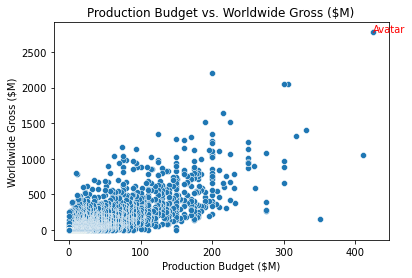

In [10]:
ax = sns.scatterplot(x=df_tn_movie_budgets['production_budget_edited'], y=df_tn_movie_budgets['worldwide_gross_edited'])

ax.set_title('Production Budget vs. Worldwide Gross ($M)')
ax.set_ylabel('Worldwide Gross ($M)')
ax.set_xlabel('Production Budget ($M)')

ax.text(df_tn_movie_budgets.production_budget_edited[df_tn_movie_budgets.movie=='Avatar'],
        df_tn_movie_budgets.worldwide_gross_edited[df_tn_movie_budgets.movie=='Avatar'],
         "Avatar", color='red');

Calculating an ROI figure.

In [11]:
df_tn_movie_budgets['ROI'] = df_tn_movie_budgets['worldwide_gross_edited'] / df_tn_movie_budgets['production_budget_edited']

df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410.6,241.063875,1045.663875,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350.0,42.762350,149.762350,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330.6,459.005868,1403.013963,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317.0,620.181382,1316.721747,4.153696


In [12]:
df_tn_movie_budgets_ROIaboveX = df_tn_movie_budgets[df_tn_movie_budgets['ROI'] >= 5]

df_tn_movie_budgets_ROIaboveX.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279,6.532577
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306.0,936.662225,2053.311220,6.710167
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300.0,678.815482,2048.134200,6.827114
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",225.0,623.279547,1517.935897,6.746382
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215.0,652.270625,1648.854864,7.669092


Showing movies with ROI > 5

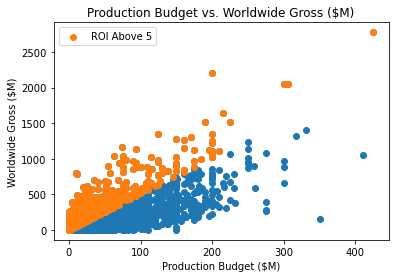

In [13]:
fig, ax = plt.subplots()

ax.scatter(x=df_tn_movie_budgets['production_budget_edited'], y=df_tn_movie_budgets['worldwide_gross_edited'])
ax.scatter(x=df_tn_movie_budgets_ROIaboveX['production_budget_edited'], 
           y=df_tn_movie_budgets_ROIaboveX['worldwide_gross_edited'], label='ROI Above 5')

ax.set_title('Production Budget vs. Worldwide Gross ($M)')
ax.set_ylabel('Worldwide Gross ($M)')
ax.set_xlabel('Production Budget ($M)')
ax.legend(loc='upper left');

In [14]:
df_tn_movie_budgets_ROIaboveX.sort_values('ROI', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
5745,46,"Jun 30, 1972",Deep Throat,"$25,000","$45,000,000","$45,000,000",0.025,45.000000,45.000000,1800.000000
5613,14,"Mar 21, 1980",Mad Max,"$200,000","$8,750,000","$99,750,000",0.200,8.750000,99.750000,498.750000
5492,93,"Sep 25, 2009",Paranormal Activity,"$450,000","$107,918,810","$194,183,034",0.450,107.918810,194.183034,431.517853
5679,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",0.100,22.764410,41.656474,416.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,"$600,000","$140,539,099","$248,300,000",0.600,140.539099,248.300000,413.833333
...,...,...,...,...,...,...,...,...,...,...
4290,91,"Sep 18, 1981",Mommie Dearest,"$5,000,000","$19,032,000","$25,032,000",5.000,19.032000,25.032000,5.006400
3851,52,"Feb 12, 2010",My Name is Khan,"$8,470,000","$4,046,336","$42,355,526",8.470,4.046336,42.355526,5.000652
3176,77,"Dec 20, 1989",Born on the Fourth of July,"$14,000,000","$70,001,698","$70,001,698",14.000,70.001698,70.001698,5.000121
3373,74,"Oct 7, 1960",Spartacus,"$12,000,000","$30,000,000","$60,000,000",12.000,30.000000,60.000000,5.000000


Only interested in relevant movies - post 2009

In [15]:
df_tn_movie_budgets_ROIaboveX['Year'] = df_tn_movie_budgets_ROIaboveX['release_date'].str[-4:]*1
df_tn_movie_budgets_ROIaboveX['Year'] = df_tn_movie_budgets_ROIaboveX['Year'].astype(int)
df_tn_movie_budgets_ROIaboveX.head()

<ipython-input-15-efe7ba5d9c1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_movie_budgets_ROIaboveX['Year'] = df_tn_movie_budgets_ROIaboveX['release_date'].str[-4:]*1
<ipython-input-15-efe7ba5d9c1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tn_movie_budgets_ROIaboveX['Year'] = df_tn_movie_budgets_ROIaboveX['Year'].astype(int)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI,Year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279,6.532577,2009
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306.0,936.662225,2053.311220,6.710167,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300.0,678.815482,2048.134200,6.827114,2018
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",225.0,623.279547,1517.935897,6.746382,2012
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215.0,652.270625,1648.854864,7.669092,2015


In [16]:
df_tn_movie_budgets_post2009 = df_tn_movie_budgets_ROIaboveX[df_tn_movie_budgets_ROIaboveX['Year'] >= 2009]
df_tn_movie_budgets_post2009.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI,Year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279,6.532577,2009
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306.0,936.662225,2053.311220,6.710167,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300.0,678.815482,2048.134200,6.827114,2018
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",225.0,623.279547,1517.935897,6.746382,2012
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215.0,652.270625,1648.854864,7.669092,2015


In [17]:
df_tn_movie_budgets_post2009.shape

(378, 11)

In [18]:
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In order to translte the genre_ids into meaningful genre names, we must retrieve the genre key from TMDB:

In [19]:
api_key = "d012e23fce658ca5d5707ca650488781"

import requests

url = 'https://api.themoviedb.org/3/genre/movie/list?api_key={}&language=en-US'.format(api_key)

tmdb_genre = requests.get(url)
print(tmdb_genre)
print(type(tmdb_genre.content))
print(tmdb_genre.text)

<Response [200]>
<class 'bytes'>
{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}


In [20]:
tmdb_genre = tmdb_genre.json()
tmdb_genre

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

In [164]:
tmdb_genre_dict = {}

for x in range(len(tmdb_genre['genres'])):
    entry = {tmdb_genre['genres'][x]['id']: tmdb_genre['genres'][x]['name']}
    tmdb_genre_dict.update(entry)

tmdb_genre_dict

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [175]:
keys_values = tmdb_genre_dict.items()

tmdb_genre_dict = {str(key): str(value) for key, value in keys_values}
tmdb_genre_dict
#types1 = [type(k) for k in tmdb_genre_dict.keys()]
#types1

{'28': 'Action',
 '12': 'Adventure',
 '16': 'Animation',
 '35': 'Comedy',
 '80': 'Crime',
 '99': 'Documentary',
 '18': 'Drama',
 '10751': 'Family',
 '14': 'Fantasy',
 '36': 'History',
 '27': 'Horror',
 '10402': 'Music',
 '9648': 'Mystery',
 '10749': 'Romance',
 '878': 'Science Fiction',
 '10770': 'TV Movie',
 '53': 'Thriller',
 '10752': 'War',
 '37': 'Western'}

In [178]:
#df_tmdb_movies['genre'] = df_tmdb_movies['genre'].map(tmdb_genre_dict)
#df_tmdb_movies.head()

In [86]:
type(df_tmdb_movies['genre'][0])

list

In [132]:
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [135]:
df_tmdb_movies['genre_ids'][0]

'[12, 14, 10751]'

In [140]:
df_tmdb_movies['genre'] = df_tmdb_movies['genre_ids'].str.strip('[]')
df_tmdb_movies['genre'] = df_tmdb_movies['genre'].str.replace(' ', '')
df_tmdb_movies['genre'] = df_tmdb_movies['genre'].str.split(',')

df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[12, 14, 10751]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[14, 12, 16, 10751]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[16, 35, 10751]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]"


In [210]:
df_test = df_tmdb_movies[['genre']]

#df_test['genre_actual'] = df_test['genre'].replace(tmdb_genre_dict, inplace=True)

df_test2 = pd.DataFrame(df_test['genre'].values.tolist())

display(df_test)
df_test2

,genre
0,"[12, 14, 10751]"
1,"[14, 12, 16, 10751]"
2,"[12, 28, 878]"
3,"[16, 35, 10751]"
4,"[28, 878, 12]"
...,...
26512,"[27, 18]"
26513,"[18, 53]"
26514,"[14, 28, 12]"
26515,"[10751, 12, 28]"


,0,1,2,3,4,5,6
0,12,14,10751,None,None,None,None
1,14,12,16,10751,None,None,None
2,12,28,878,None,None,None,None
3,16,35,10751,None,None,None,None
4,28,878,12,None,None,None,None
...,...,...,...,...,...,...,...
26512,27,18,None,None,None,None,None
26513,18,53,None,None,None,None,None
26514,14,28,12,None,None,None,None
26515,10751,12,28,None,None,None,None


In [36]:
dic = {1:'Action', 2:'Comedy', 3:'Adventure'}

def list_lookup_to_dict(lst):
    new_list = []
    for element in lst:
        if element in tmdb_genre_dict.keys():
            new_list.append(tmdb_genre_dict[element])
    return new_list
            
list_lookup_to_dict(lst)


[]

In [184]:
lst = [1,2,3,5,7]
dic = {1:'Action', 2:'Comedy', 3:'Adventure'}

def check_list_to_dict(lst):
    new_list = []
    for i in lst:
        if i in tmdb_genre_dict.keys():
            new_list.append(tmdb_genre_dict[i])
    return new_list

check_list_to_dict(lst)

df_genre_test = pd.DataFrame(lst, columns=['genre_code'])

#df_genre_test['genre'] = df_genre_test['genre_code'].apply(check_list_to_dict)

df_genre_test.head()

,genre_code
0,1
1,2
2,3
3,5
4,7


In [31]:
df_tn_movie_budgets['release_date'] = pd.to_datetime(df_tn_movie_budgets['release_date'])
df_tmdb_movies['release_date'] = pd.to_datetime(df_tmdb_movies['release_date'])
tn_tmdb_merged_df = df_tmdb_movies.merge(df_tn_movie_budgets, how='inner', left_on=['original_title','release_date'], 
                                         right_on=['movie','release_date'])
tn_tmdb_merged_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,genre_actual,id_y,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,[],30,How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992",165.00,217.581232,494.870992,2.999218
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,[],15,Iron Man 2,"$170,000,000","$312,433,331","$621,156,389",170.00,312.433331,621.156389,3.653861
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,[],37,Toy Story,"$30,000,000","$191,796,233","$364,545,516",30.00,191.796233,364.545516,12.151517
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,[],37,Toy Story,"$30,000,000","$191,796,233","$364,545,516",30.00,191.796233,364.545516,12.151517
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,[],38,Inception,"$160,000,000","$292,576,195","$835,524,642",160.00,292.576195,835.524642,5.222029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,24598,"[53, 18, 27]",510284,en,Braid,5.972,2019-02-01,Braid,6.4,18,...,[],48,Braid,"$1,660,000",$0,"$80,745",1.66,0.000000,0.080745,0.048642
1397,24638,"[18, 10752]",514407,en,Indivisible,5.599,2018-10-26,Indivisible,5.4,13,...,[],93,Indivisible,"$2,700,000","$3,511,417","$3,588,305",2.70,3.511417,3.588305,1.329002
1398,24691,"[18, 28, 80]",547590,en,El Chicano,5.274,2019-05-03,El Chicano,9.0,1,...,[],16,El Chicano,"$8,000,000","$700,261","$700,261",8.00,0.700261,0.700261,0.087533
1399,24815,"[18, 35, 28, 80]",506971,ur,Teefa in Trouble,4.486,2018-07-20,Teefa in Trouble,7.6,11,...,[],8,Teefa in Trouble,"$1,500,000",$0,"$98,806",1.50,0.000000,0.098806,0.065871


In [28]:
type(df_tmdb_movies['genre'][0])

list

In [29]:
#df_tmdb_movies = pd.DataFrame(df_tmdb_movies['genre'].to_list(), columns=['genre1', 'genre2', 'genre3', 'genre4'])

df_tmdb_movies['genre_actual'] = df_tmdb_movies['genre'].apply(list_lookup_to_dict)

df_tmdb_movies['genre'].apply(list_lookup_to_dict)

0        []
1        []
2        []
3        []
4        []
         ..
26512    []
26513    []
26514    []
26515    []
26516    []
Name: genre, Length: 26517, dtype: object

In [ ]:
#for key, value in tmdb_genre_dict.items():
#    df_tmdb_movies[value] = 0

#df_tmdb_movies.head()

In [ ]:
df_tmdb_movies.merge(df_tn_movie_budgets, how='inner', left_on=['original_title'], right_on=['movie'])